# 4. Visualisations & Relationship Analysis between Variables (Continued in R)

In [9]:
#importing libraries 

library(ggplot2)
library(dplyr)
library(maps)
library(viridis)
library(ggrepel)
library(readr)
library(plotly)
library(reshape2)

cleaned <- read_csv("C:/Users/65918/Desktop/CODE/cleaned.csv")


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_double(),
  town_name = col_character()
)
See spec(...) for full column specifications.


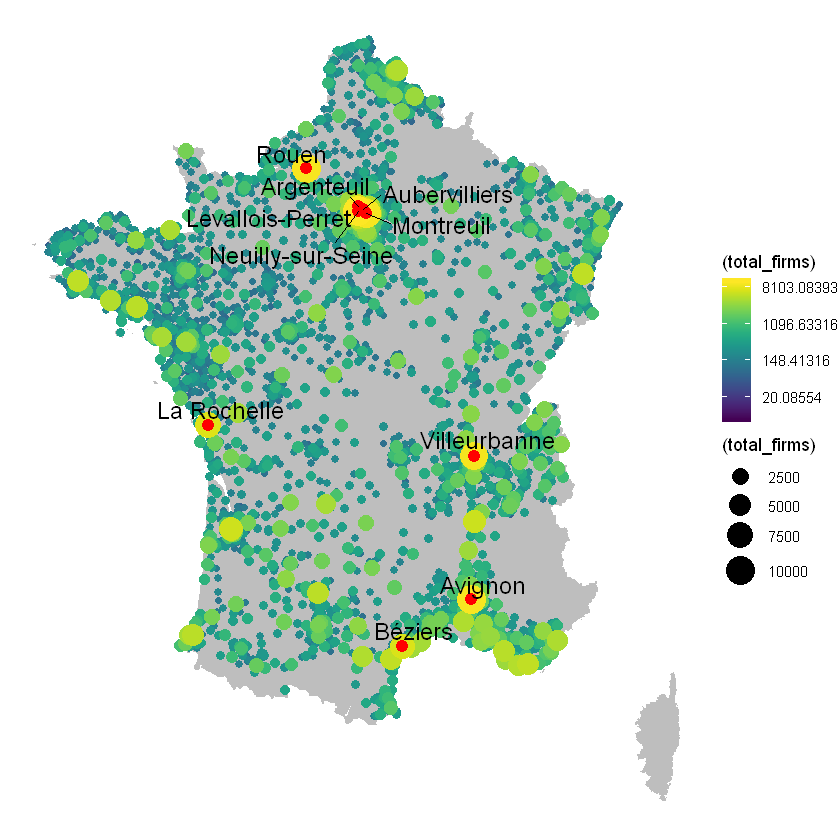

In [20]:
fr <- map_data("france")
sorted_firms <- cleaned[order(cleaned$total_firms),] #ensures larger dots will be seen on top

#Number of firms
#Seems that most of the biggest towns are in the capital of Paris. Coastal cities also tend to have more firms 

(ggplot() + geom_polygon(data = fr, aes(x=long, y=lat, group=group), fill = "grey", alpha =1) 
          + geom_point(data=sorted_firms, aes(x=longitude, y=latitude, size=(total_firms), col = (total_firms)))
          + geom_point(data=sorted_firms  %>% tail(10), aes(x=longitude, y=latitude), color="red", size=3) 
          + geom_text_repel(data=sorted_firms  %>% tail(10), aes(x=longitude, y=latitude, label=town_name), size=5)
          + scale_size_continuous(range = c(1,8))
          + scale_color_viridis(trans="log") + theme_void())

From the above, we can see that most of the towns with high number of firms tend to be concentrated along the coastline of France, with the exception of towns that are located in Paris, the capital of France. (The region with Argenteuil, Auberviliers, Levallois-Perret, Montreuil, Neuilly-sur-Seine). The number of firms in an area also tend to be related to the number of firms in their surrounding geographic vicinity. 

# Looking at GDP (Gross Domestic Product) per Hour on a Map

In [ ]:
cleaned$GDPPerHour <- cleaned$SNHM14 * cleaned$pop_size #creating new variable by multiplying population size and mean wage per hour
sorted_GDPPerHour <- cleaned[order(cleaned$GDPPerHour),] #ensures larger dots will be seen on top

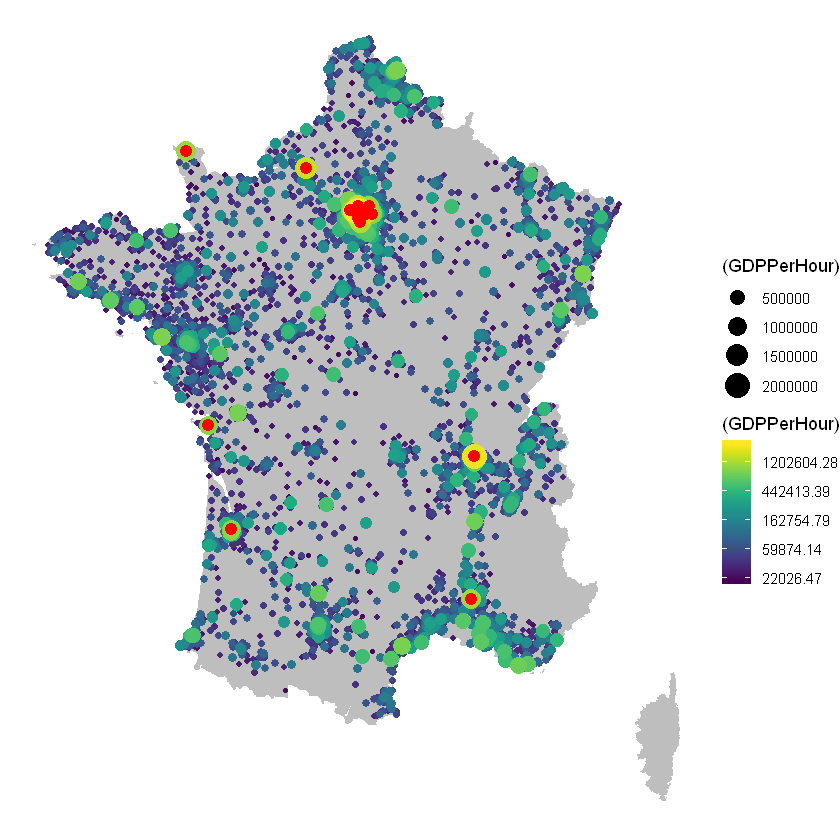

In [25]:
(ggplot() + geom_polygon(data = fr, aes(x=long, y=lat, group=group), fill = "grey", alpha =1) 
  + geom_point(data=sorted_GDPPerHour, aes(x=longitude, y=latitude, size=(GDPPerHour), col = (GDPPerHour)))
  + geom_point(data=sorted_GDPPerHour  %>% tail(20), aes(x=longitude, y=latitude), color="red", size=3) 
  #+ geom_text_repel(data=sorted_GDPPerHour  %>% tail(20), aes(x=longitude, y=latitude, label=town_name), size=5)
  + scale_size_continuous(range = c(1,7))
  + scale_color_viridis(trans="log") + theme_void())

From the above, we can see that 70% of the top 20 towns generating the highest GDP per hour is located in Paris. However, to have a more accurate picture of the wealth inequality, we should take a look at how much an average worker is recieving in the various different towns

# Looking at Average Wage per hour on a Map

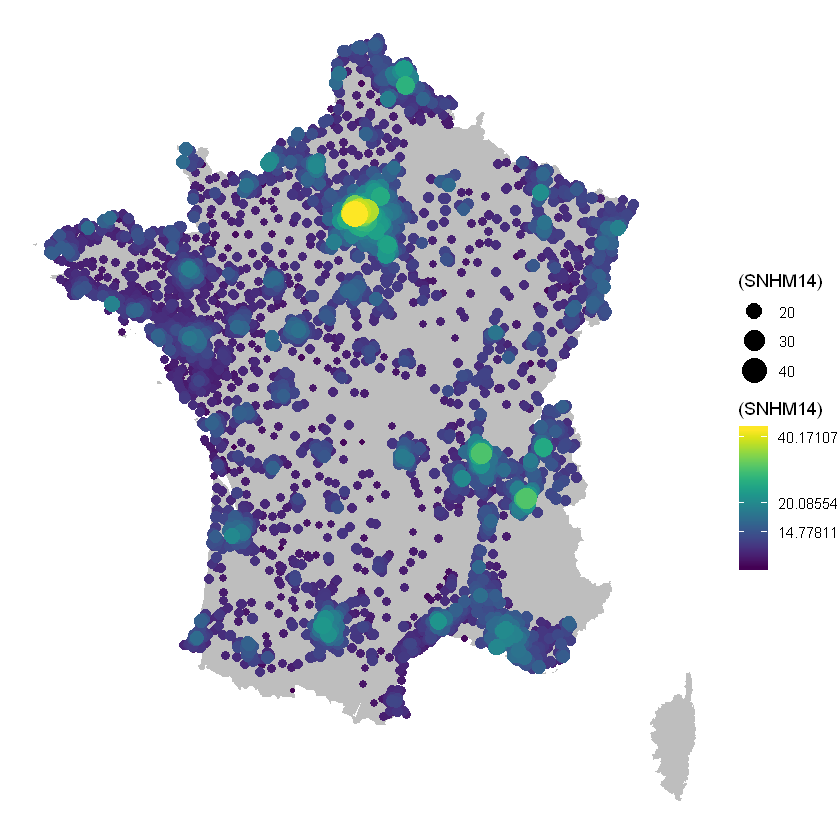

In [24]:
sorted_avgwage <- cleaned[order(cleaned$SNHM14),]

(ggplot() + geom_polygon(data = fr, aes(x=long, y=lat, group=group), fill = "grey", alpha =1) 
  + geom_point(data=sorted_avgwage, aes(x=longitude, y=latitude, size=(SNHM14), col = (SNHM14)))
  #+ geom_point(data=sorted_avgwage  %>% tail(20), aes(x=longitude, y=latitude), color="red", size=3) 
  #+ geom_text_repel(data=sorted_avgwage  %>% tail(20), aes(x=longitude, y=latitude, label=town_name), size=5)
  + scale_size_continuous(range = c(1,7))
  + scale_color_viridis(trans="log") + theme_void())

From the above, we can see that there exists extreme inequality in the mean hourly net wage between paris and the rest of France. (Evidenced by the color being light-yellowish near the centre of Paris, and darker hues at the rest of France).

# Plotting top 100 towns by average mean hourly net salary

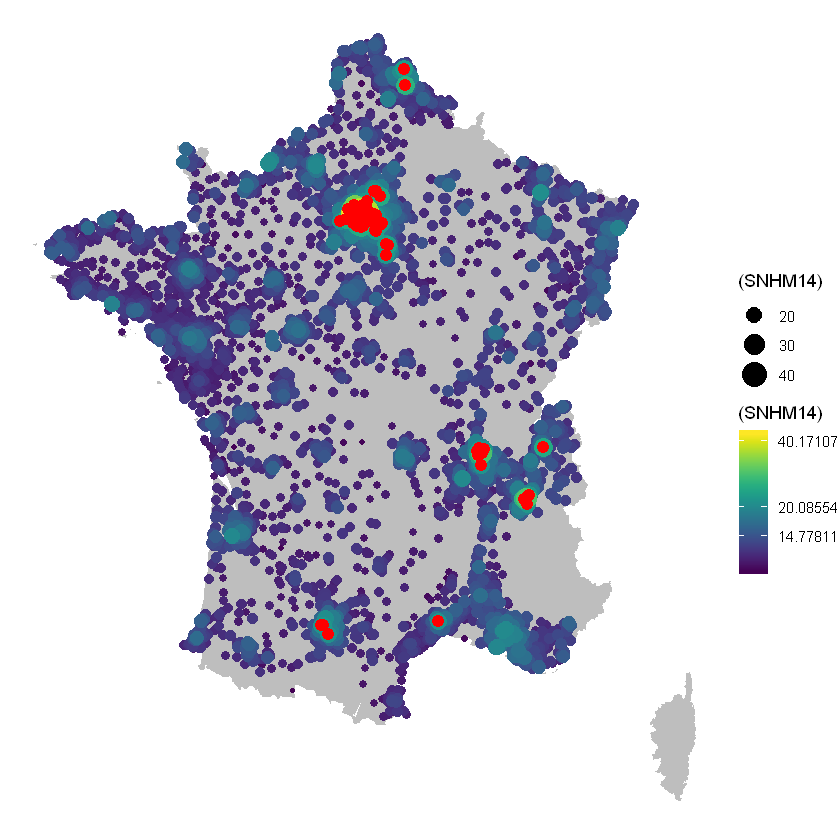

In [27]:
(ggplot() + geom_polygon(data = fr, aes(x=long, y=lat, group=group), fill = "grey", alpha =1) 
  + geom_point(data=sorted_avgwage, aes(x=longitude, y=latitude, size=(SNHM14), col = (SNHM14)))
  + geom_point(data=sorted_avgwage  %>% tail(100), aes(x=longitude, y=latitude), color="red", size=3) 
  #+ geom_text_repel(data=sorted_avgwage  %>% tail(20), aes(x=longitude, y=latitude, label=town_name), size=5)
  + scale_size_continuous(range = c(1,7))
  + scale_color_viridis(trans="log") + theme_void())

The plot above further supports the claim of extreme inequality, as it seems that around 80% of the top 100 towns with the highest mean hourly net salary seems to be concentrated in a region. This indicates geographical inequality. 

# Average mean hourly net salary with Top 20 towns by number of firms 

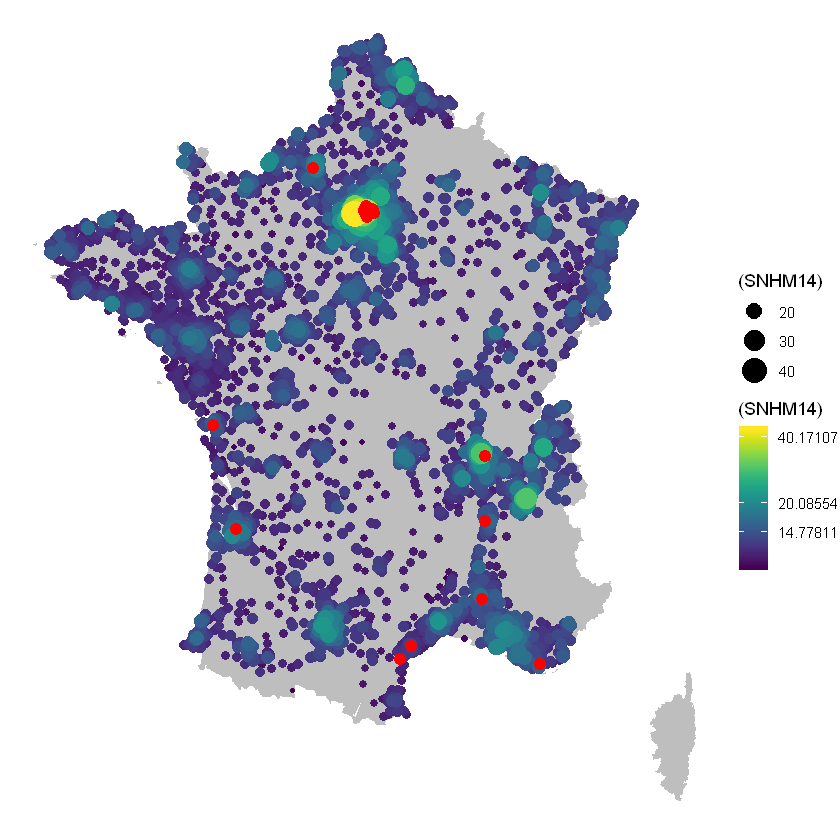

In [28]:
(ggplot() + geom_polygon(data = fr, aes(x=long, y=lat, group=group), fill = "grey", alpha =1) 
  + geom_point(data=sorted_avgwage, aes(x=longitude, y=latitude, size=(SNHM14), col = (SNHM14)))
  + geom_point(data=sorted_firms  %>% tail(20), aes(x=longitude, y=latitude), color="red", size=3) 
  #+ geom_text_repel(data=sorted_avgwage  %>% tail(20), aes(x=longitude, y=latitude, label=town_name), size=5)
  + scale_size_continuous(range = c(1,7))
  + scale_color_viridis(trans="log") + theme_void())

While one would expect that an area with higher number of firms to be more economically productive and hence have a higher average mean hourly net salary per worker, this is seen otherwise in the above plot. The red dots represent the top 20 towns with the highest number of firms. However, these towns are mostly not the towns with the highest mean hourly net salary. This could be due to differences in the types of industries in such towns - they can be selling goods lower in the value chain as compared to the towns in Paris. 

# Looking at whether differences in mean net hourly salary between regions are statistically significant

In [8]:
freg <- as.factor(cleaned$REG)
your.aov.salary = aov(cleaned$SNHM14~cleaned$REG)
summary(your.aov.salary) 
tuk_salary_reg <- TukeyHSD(aov(cleaned$SNHM14~freg))
tuk_salary_reg 

              Df Sum Sq Mean Sq F value Pr(>F)    
cleaned$REG    1   1127  1126.5   167.1 <2e-16 ***
Residuals   4322  29143     6.7                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = cleaned$SNHM14 ~ freg)

$freg
              diff        lwr           upr     p adj
21-11 -4.638557818 -5.7835308 -3.4935848434 0.0000000
22-11 -3.596473362 -4.4469969 -2.7459498194 0.0000000
23-11 -3.644382264 -4.4637201 -2.8250444560 0.0000000
24-11 -3.916649044 -4.5722163 -3.2610817755 0.0000000
25-11 -4.786138614 -5.6504927 -3.9217845137 0.0000000
26-11 -4.760583637 -5.6473922 -3.8737750420 0.0000000
31-11 -4.129616754 -4.6783896 -3.5808438646 0.0000000
41-11 -4.542871752 -5.1907427 -3.8950008248 0.0000000
42-11 -3.566458001 -4.2946102 -2.8383057605 0.0000000
43-11 -4.668964204 -5.6336881 -3.7042402831 0.0000000
52-11 -4.650568600 -5.2020935 -4.0990437227 0.0000000
53-11 -4.617909614 -5.1597163 -4.0761028801 0.0000000
54-11 -4.590078804 -5.3332369 -3.8469207277 0.0000000
72-11 -4.311180683 -4.9219686 -3.7003927993 0.0000000
73-11 -3.713323178 -4.3818946 -3.0447517922 0.0000000
74-11 -4.72

Based on the ANOVA test, we can conclude that the difference in mean hourly net salary between the regions is statistically significant at the 95% level of significance. 

To analyse further, I conducted a tukeyHSD test to look at the pairwise differences in mean hourly net salary. The reg code for Paris is 11 and the tukeyHSD test further supports the claim that Paris is extremely well ahead of the other regions. For the other regions of France, the income distribution tends to be relatively more equal. 

# Using barplot to visualise salary by job type

No id variables; using all as measure variables


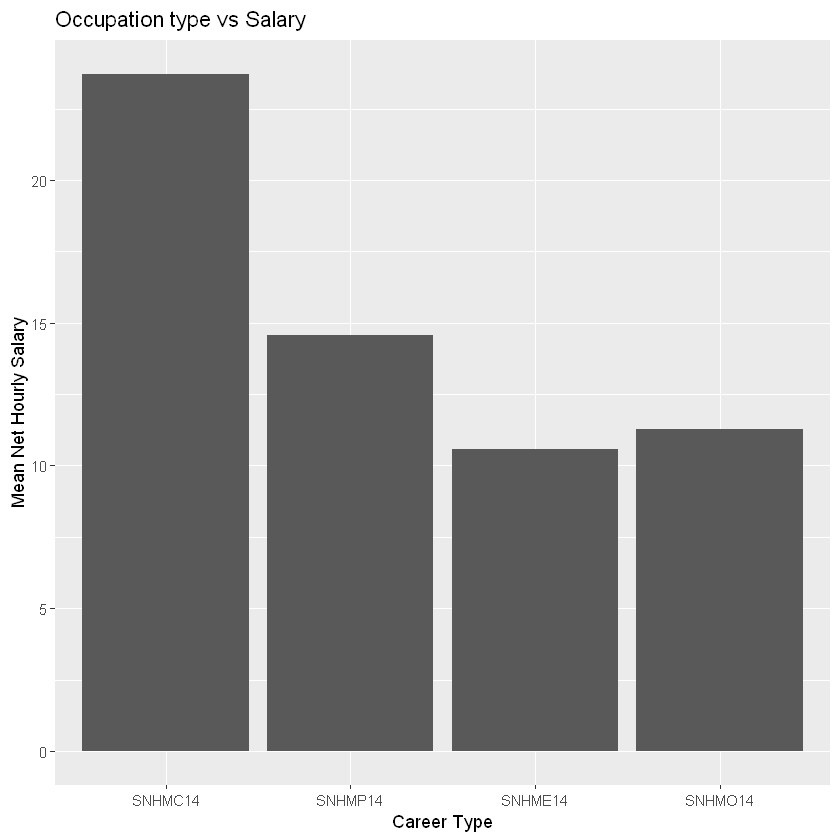

In [39]:
melt <- melt(cleaned[,13:16])
occupation_mean_sal <- aggregate(melt$value, list(melt$variable), mean)
p <- ggplot() + geom_bar(data=occupation_mean_sal, aes(x=Group.1, y=x), position =position_dodge(), stat= "identity") 
p + xlab("Career Type")+ ylab('Mean Net Hourly Salary') + ggtitle("Occupation type vs Salary")

Executives tend to earn way more than the other job occupations 

In [40]:
your.aov.careertype = aov(melt$value~melt$variable)
summary(your.aov.careertype) 
tuk_salary_age <- TukeyHSD(your.aov.careertype)
tuk_salary_age

                 Df Sum Sq Mean Sq F value Pr(>F)    
melt$variable     3 474328  158109   49857 <2e-16 ***
Residuals     17292  54837       3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = melt$value ~ melt$variable)

$`melt$variable`
                       diff         lwr         upr p adj
SNHMP14-SNHMC14  -9.1438714  -9.2422720  -9.0454708     0
SNHME14-SNHMC14 -13.1410268 -13.2394274 -13.0426263     0
SNHMO14-SNHMC14 -12.4533765 -12.5517771 -12.3549759     0
SNHME14-SNHMP14  -3.9971554  -4.0955560  -3.8987548     0
SNHMO14-SNHMP14  -3.3095051  -3.4079057  -3.2111045     0
SNHMO14-SNHME14   0.6876503   0.5892498   0.7860509     0


The p-values are all lesser than 0.05. This means that the differences in mean hourly net salary between the different career types are statistically significant at the 95% level of significance

# Using grouped barplots to visualise salaries by job type and gender

No id variables; using all as measure variables


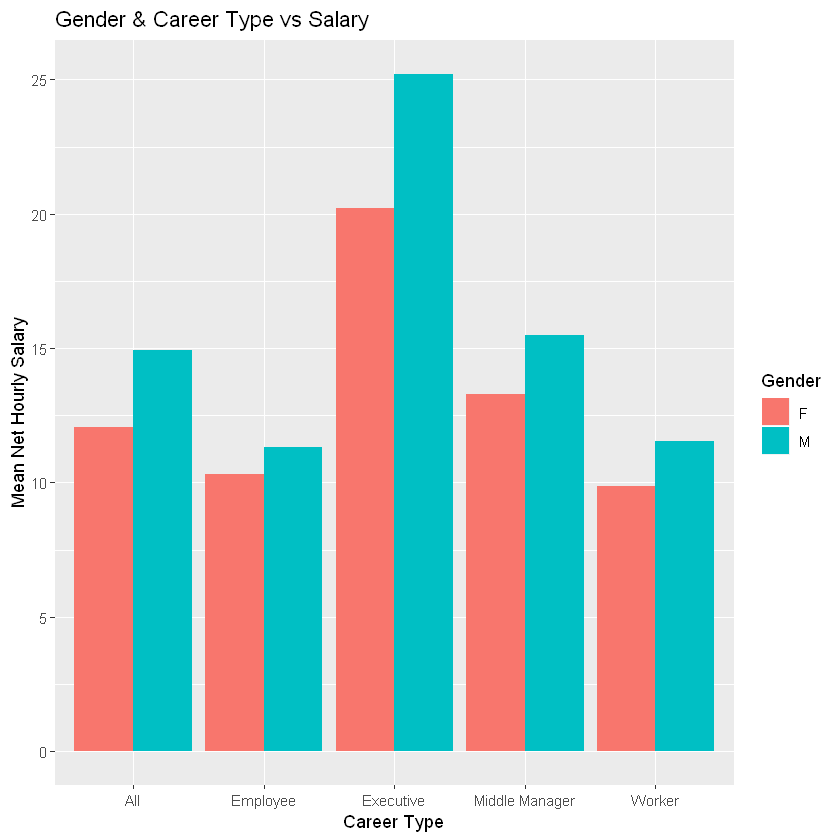

In [30]:
melt_gender <- melt(cleaned[,17:26])
melt_gender$Type <- NA
melt_gender$Gender <- NA
melt_gender$Type[melt_gender$variable == 'SNHMF14' | melt_gender$variable == 'SNHMH14'] <- 'All'
melt_gender$Type[melt_gender$variable == 'SNHMFC14' | melt_gender$variable == 'SNHMHC14'] <- 'Executive'
melt_gender$Type[melt_gender$variable == 'SNHMFP14' | melt_gender$variable == 'SNHMHP14'] <- 'Middle Manager'
melt_gender$Type[melt_gender$variable == 'SNHMFE14' | melt_gender$variable == 'SNHMHE14'] <- 'Employee'
melt_gender$Type[melt_gender$variable == 'SNHMFO14' | melt_gender$variable == 'SNHMHO14'] <- 'Worker'

melt_gender$Gender[melt_gender$variable == 'SNHMF14'|melt_gender$variable == 'SNHMFC14'|melt_gender$variable == 'SNHMFP14'|
                     melt_gender$variable == 'SNHMFE14'| melt_gender$variable == 'SNHMFO14'] <- 'F'
melt_gender$Gender[is.na(melt_gender$Gender)] <- 'M'
gen_career<- aggregate(.~Type+Gender,melt_gender, mean)
p <- ggplot() + geom_bar(data=gen_career, aes(x=Type, y=value, fill = Gender), position =position_dodge(), stat= "identity") 
p + xlab("Career Type")+ ylab('Mean Net Hourly Salary') + ggtitle("Gender & Career Type vs Salary")

Quite a sizable difference in wages between female and males, with the biggest difference between executives (roughly 20%).  


# Using ANOVA Test to test if the difference in wages between genders is significant

In [13]:
f <- as.factor(melt_gender$Gender)
your.aov.gender <- aov(melt_gender$value~melt_gender$Gender)
summary(your.aov.gender)

                      Df  Sum Sq Mean Sq F value Pr(>F)    
melt_gender$Gender     1   69792   69792    2898 <2e-16 ***
Residuals          43238 1041326      24                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

The p value is lesser than 0.05. Hence, we can say at a 95% level of significance that the difference in the average mean hourly net salary between the genders is statistically significant. Hence, there may be a gender discrimination present in France. 

# Using barplots to visualise the differences in salary between the age groups

No id variables; using all as measure variables


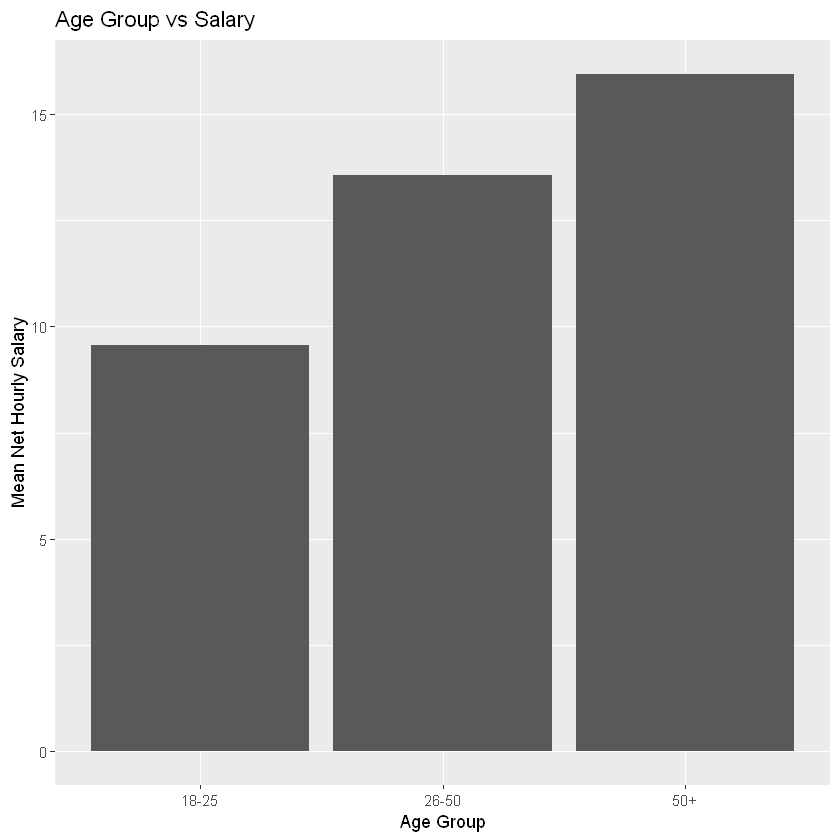

In [31]:
melt_age <- melt(cleaned[,27:29])
melt_age$AgeGroup <- NA
melt_age$AgeGroup[melt_age$variable == 'SNHM1814'] <- '18-25'
melt_age$AgeGroup[melt_age$variable == 'SNHM2614'] <- '26-50'
melt_age$AgeGroup[melt_age$variable == 'SNHM5014'] <- '50+'

age_mean_sal <- aggregate(melt_age$value, list(melt_age$AgeGroup), mean)
p1 <- ggplot(age_mean_sal, aes(x=Group.1,y = x)) +geom_bar(stat = "identity")
p1 + xlab("Age Group")+ ylab('Mean Net Hourly Salary') + ggtitle("Age Group vs Salary")

Older tends to earn more, this can be due to differences in working experiences between the age groups. 

# Using ANOVA & TukeyHSD Test to test if the difference in wages between age groups is significant

In [15]:
your.aov.age = aov(melt_age$value~melt_age$AgeGroup)
summary(your.aov.age) 
tuk_salary_age <- TukeyHSD(your.aov.age)
tuk_salary_age

                     Df Sum Sq Mean Sq F value Pr(>F)    
melt_age$AgeGroup     2  89963   44982    6502 <2e-16 ***
Residuals         12969  89725       7                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = melt_age$value ~ melt_age$AgeGroup)

$`melt_age$AgeGroup`
                diff      lwr      upr p adj
26-50-18-25 3.998381 3.865786 4.130976     0
50+-18-25   6.383025 6.250430 6.515620     0
50+-26-50   2.384644 2.252049 2.517239     0


The p values are lesser than 0.05. Hence, we can say at a 95% level of significance that the difference in the average mean hourly net salary between the age groups are statistically significant. Hence, this means that the older age groups do indeed tend to earn more.

# Using Grouped Barplots to visualise the salary differences between Age & Gender 

No id variables; using all as measure variables


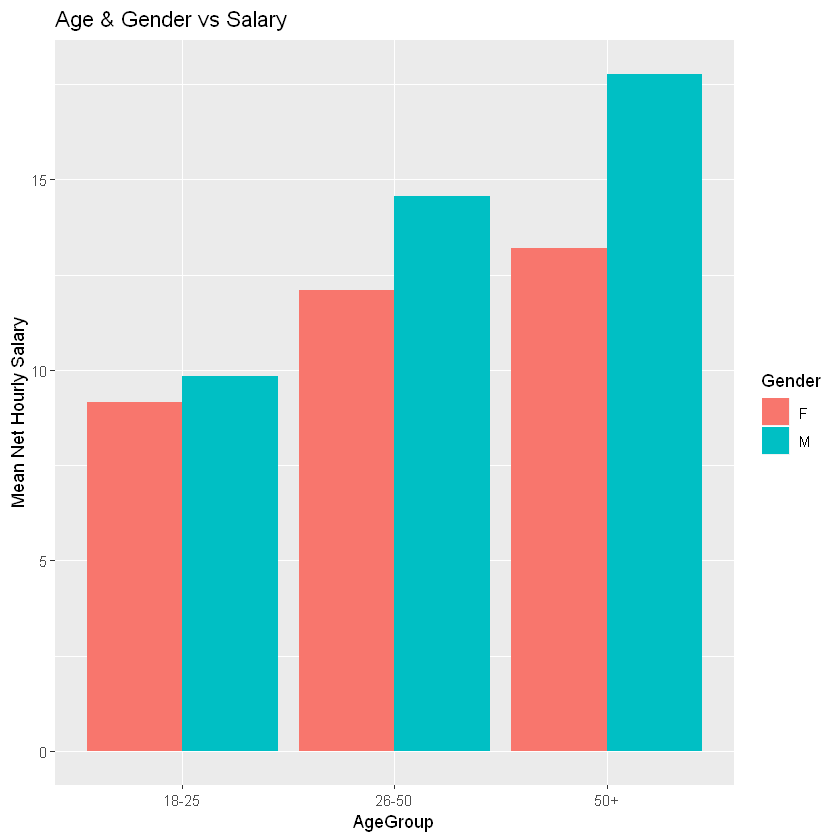

In [16]:
melt_genage <- melt(cleaned[,30:35])
melt_genage$AgeGroup <- NA
melt_genage$Gender <- NA

melt_genage$AgeGroup[melt_genage$variable == 'SNHMF1814' | melt_genage$variable == 'SNHMH1814'] <- '18-25'
melt_genage$AgeGroup[melt_genage$variable == 'SNHMF2614' | melt_genage$variable == 'SNHMH2614'] <- '26-50'
melt_genage$AgeGroup[melt_genage$variable == 'SNHMF5014' | melt_genage$variable == 'SNHMH5014'] <- '50+'

melt_genage$Gender[melt_genage$variable == 'SNHMF1814' |melt_genage$variable == 'SNHMF2614'|
                   melt_genage$variable == 'SNHMF5014'] <- 'F'
melt_genage$Gender[is.na(melt_genage$Gender)] <- 'M'

agg_genage <- aggregate(.~AgeGroup+Gender,melt_genage, mean)
p2 <- ggplot() + geom_bar(data= agg_genage, aes(x=AgeGroup, y=value, fill = Gender), position =position_dodge(), stat= "identity") 
p2 + xlab("AgeGroup")+ ylab('Mean Net Hourly Salary') + ggtitle("Age & Gender vs Salary")

General trends we described above for age and gender still remain. The increment in salary with age is however seen in greater effect for males.


# 5. Modelling to predict income

# Using a simple multivariate regression model to predict mean net hourly salary in a town

The simple linear regression model has been chosen since the "target" variable that we have here is the mean hourly net salary, which is continuous in nature. I did not use other ML models like Random Forest as the aim of this section is to just get a rough sensing of how the variables affect the salary when fitted with a best fit regression line. 

In [35]:
library(dplyr)
#Scale the continuous variables first by standardising it 
df_reg <- cleaned[,c(6,7,8,9,10,11,12,36,37,38)]
df_reg <- df_reg %>% mutate_at(c(1,2,3,4,5,6,8,9,10), funs(c(scale(.))))

Scaling the data is extremely important here as the variables that we have are of different units. This allows the coefficient of the linear regression model to be better interpreted. The variables have been chosen as I wanted to analyse how the number of firms, population size and the climate (longitude and latitude) can help to predict the mean hourly net salary in a town 

In [36]:
fit <- lm(SNHM14~total_firms+unknown_firms+micro_firms+small_firms+medium_firms+large_firms+latitude+
            longitude+pop_size, data=df_reg)
summary(fit)


Call:
lm(formula = SNHM14 ~ total_firms + unknown_firms + micro_firms + 
    small_firms + medium_firms + large_firms + latitude + longitude + 
    pop_size, data = df_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9263  -1.4229  -0.5117   0.8364  28.5078 

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    13.77565    0.03689 373.420  < 2e-16 ***
total_firms   -36.80137   17.33532  -2.123   0.0338 *  
unknown_firms  27.83723   11.47836   2.425   0.0153 *  
micro_firms     6.98645    4.81893   1.450   0.1472    
small_firms     2.99910    1.08650   2.760   0.0058 ** 
medium_firms    0.56727    0.32754   1.732   0.0834 .  
large_firms          NA         NA      NA       NA    
latitude        0.38154    0.03916   9.744  < 2e-16 ***
longitude       0.27513    0.03718   7.399 1.64e-13 ***
pop_size       -0.52420    0.10177  -5.151 2.71e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.

The p-value for the coefficient of micro_firms, medium_firms is greater than 0.05. Hence, this means that they are not statistically significant at the 95% level of significance. Remove them from the linear model. The p-value for large_firms is not defined because of perfect collinerity of another independent variable. Remove this as well. 

In [37]:
fit_new <- lm(fit <- lm(SNHM14~total_firms+unknown_firms+small_firms+latitude+
                          longitude+pop_size, data=df_reg))
summary(fit_new)


Call:
lm(formula = fit <- lm(SNHM14 ~ total_firms + unknown_firms + 
    small_firms + latitude + longitude + pop_size, data = df_reg))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6307  -1.4251  -0.5189   0.8365  28.4906 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    13.77565    0.03690 373.358  < 2e-16 ***
total_firms   -11.92529    0.60728 -19.637  < 2e-16 ***
unknown_firms  11.39593    0.50415  22.604  < 2e-16 ***
small_firms     1.60996    0.13374  12.038  < 2e-16 ***
latitude        0.37765    0.03877   9.740  < 2e-16 ***
longitude       0.27312    0.03716   7.350 2.36e-13 ***
pop_size       -0.50824    0.10142  -5.011 5.62e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.426 on 4317 degrees of freedom
Multiple R-squared:  0.1605,	Adjusted R-squared:  0.1593 
F-statistic: 137.5 on 6 and 4317 DF,  p-value: < 2.2e-16


All the variables are statistically significant, hence the linear model is:

salary = 13.8 - 11.9*total_firms + 11.4 * unknown_firms + 1.61*small_firms + 0.378*latitude + 0.273 * longitude - 0.508*pop_size

The coefficients tell us how much the salary would increase of decrease should the variable's value increase by 1 standard deviation, holding the values of the other variables constant. 

However, this should still be taken with a pinch of salt as the Adjusted R squared value is 0.1593 - which is relatively small. This means that the percentage of the average hourly mean net salary's variation that a linear model can explain is only 15.9%. 

# 6. Summary of Key Findings

1. There exists a large income gap between those living near Paris and those in the rest of France; 80% of the top 100 towns by hourly mean net salary lies within the same region. 
2. Gender discrimination in the workplace exists in France, with females earning significantly lesser than their male counterparts. This is especially true for executive jobs, where the difference is ~20%. Men also experience higher pay raises as their age increases as compared to women. 
3. There is lacking evidence regarding the economic activity (measured by the total number of firms in a town) and the general wealth of the people in the town. 
4. Towns located near the coastline tend to have more firms in their borders. 
5. The number of firms in a town is strongly positively correlated with the population size.

# 7. Further Improvements

1. Data given has been aggregated for each town; if we could have gotten the data for every person living in a town - we can then proceed to calculate a gini index (objective measure of inequality used as an indicator of inequality) for each town using relevant packages
2. The linear regression model used has a low R squared and the variables used tend to be limited. Should there be more variables - such as Gender, Occupation and etc, it would have perhaps made the linear regression model a better one in predicting salary. 
3. The presence of many data points in the geographical plots can make them hard to digest for the end user. Perhaps I could have explored using geographical density plots or even look at how I could plot salary by different regions in France 
4. Proper knowledge of using the geojson files would have also improved the scope of analysis possible
5. Time series data can also be provided for us to access the level of inequality over the years